# Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
data = pd.read_csv("pima-data.csv")

In [5]:
data.shape

(767, 9)

In [6]:
data.head(10)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [7]:
# check if any null value is present
data.isnull().values.any()

False

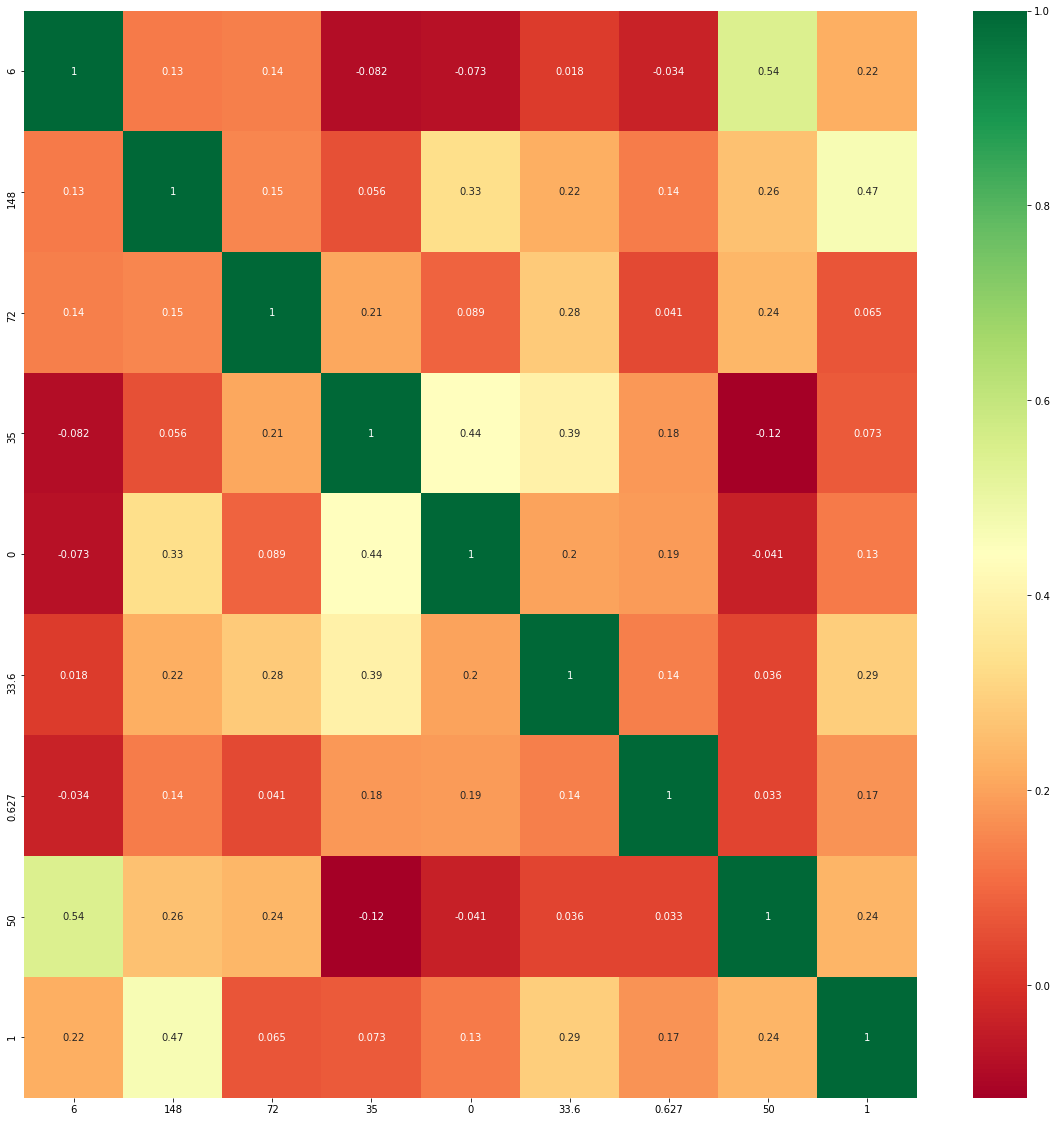

In [8]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
data.corr()

,6,148,72,35,0,33.6,0.627,50,1
6,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
148,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
72,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
35,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
0,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
33.6,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
0.627,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
50,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
1,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [10]:
diabetes_true_count = len(data.loc[data['1'] == 1])
diabetes_false_count = len(data.loc[data['1'] == 0])

In [11]:
(diabetes_true_count,diabetes_false_count)

(267, 500)

In [12]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['6', '148', '72', '35', '0', '33.6', '0.627', '50']
predicted_class = ['1']

In [13]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## Check how many other missing(zero) values

In [14]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['6'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['148'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['72'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['35'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['0'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['33.6'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['0.627'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['50'] == 0])))

total number of rows : 767
number of rows missing glucose_conc: 111
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 227
number of rows missing bmi: 373
number of rows missing diab_pred: 11
number of rows missing age: 0
number of rows missing skin: 0


In [15]:

from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=np.nan, strategy='mean')

 

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [16]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [17]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.706
